In [1]:
import os
import time

import dill
import matplotlib.pyplot as plt
import pyro
import seaborn as sns
import torch

import pandas as pd
import pyro.distributions as dist
from chirho.dynamical.handlers import LogTrajectory
from chirho.dynamical.handlers.solver import TorchDiffEq
from chirho.dynamical.ops import simulate
from pyro.infer import Predictive
from chirho.observational.handlers import condition
from chirho.dynamical.handlers import LogTrajectory, StaticBatchObservation
from chirho.dynamical.handlers.solver import TorchDiffEq
from chirho.dynamical.ops import Dynamics, State, simulate

pyro.settings.set(module_local_params=True)

sns.set_style("white")

# Set seed for reproducibility
seed = 123
pyro.clear_param_store()
pyro.set_rng_seed(seed)

import matplotlib.pyplot as plt
import seaborn as sns
import torch

from collab.foraging import locust as lc
from collab.foraging import toolkit as ft
from collab.utils import find_repo_root, progress_saver


smoke_test = "CI" in os.environ
num_iterations = 50 if smoke_test else 100
num_samples = 20 if smoke_test else 100

0 2
Loading inference samples
Running inference for validation


/home/rafal/miniconda3/envs/collab/lib/python3.10/site-packages/pyro/util.py:303: UserWarning: Found vars in model but not guide: {'counts_obs'}
  warnings.warn(f"Found vars in model but not guide: {bad_sites}")


Running SVI for 1500 steps...
[iteration 0001] loss: 31.3683


/home/rafal/miniconda3/envs/collab/lib/python3.10/site-packages/pyro/util.py:303: UserWarning: Found vars in model but not guide: {'counts_obs'}
  warnings.warn(f"Found vars in model but not guide: {bad_sites}")


[iteration 0050] loss: 27.1123
[iteration 0100] loss: 28.4075
[iteration 0150] loss: 30.1390
[iteration 0200] loss: 29.2432


KeyboardInterrupt: 

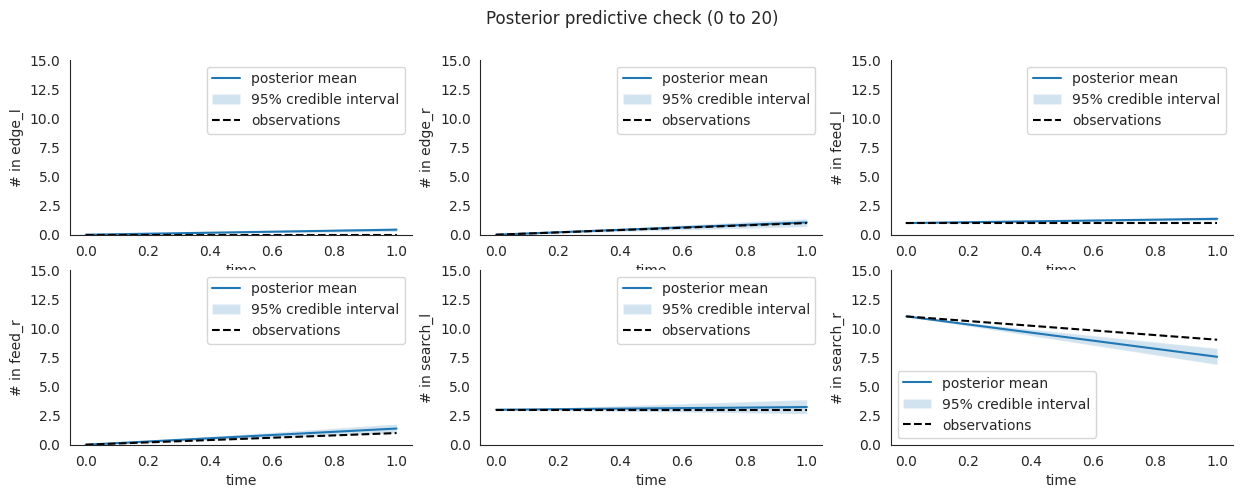

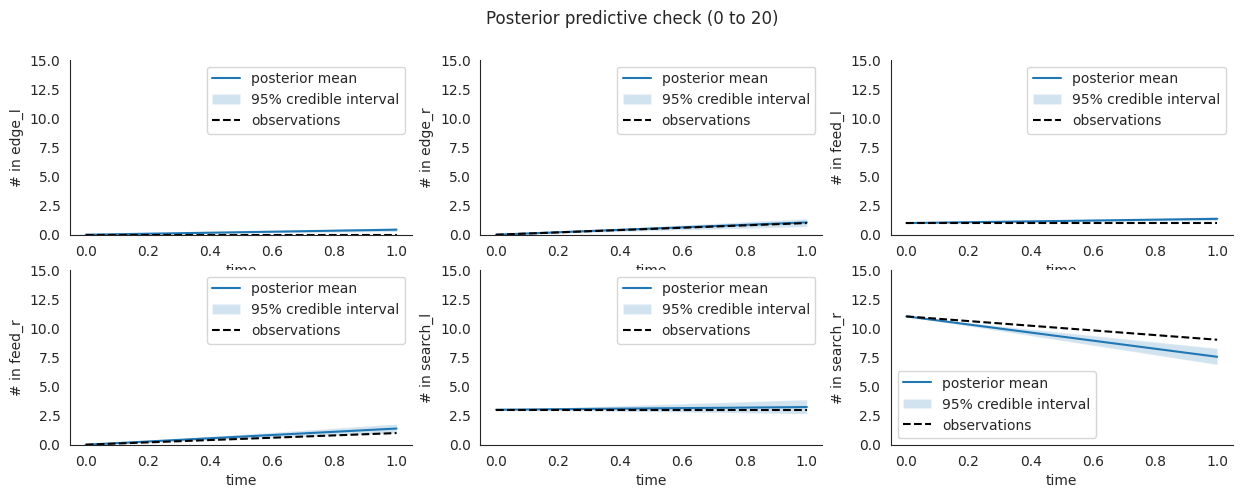

In [2]:
data_code = "15EQ20191202"
validation_data_code = "15EQ20191205"


starts = []
ends = []
null_mses = []
model_mses = []
rsquareds = []

v_null_mses = []
v_model_mses = []
v_rsquareds = []

 
for start in [0,]: # 20, 40, 60, 80, 100 ]: 
    for end in [start + end for end in [2,3,4,5,]]:#6,7,8,9,10,12,14,16,18,20,30,40,50,60,70,80]]:
        starts.append(start)
        ends.append(end)
        print(start, end)
        time.sleep(1)

        locds = lc.LocustDS(data_code = data_code, 
                    start = start,
                    end = end,)
        time.sleep(1)

        locds.run_inference("length", 
                        num_iterations= 1500,num_samples = 150)
        time.sleep(1)

        locds.posterior_check()

        for key in locds.init_state.keys():
            assert locds.init_state[key].item() == locds.samples[key][0,0,0].item(), "predictive inits are wrong"

        locds.evaluate()

        null_mses.append(locds.null_mse.numpy())   
        model_mses.append(locds.mse_mean)
        rsquareds.append(locds.rsquared)
        
        time.sleep(1)
        locds.posterior_check()
        time.sleep(1)


        locds.validate(validation_data_code = validation_data_code)
        time.sleep(1)

        
        for key in locds.v_init_state.keys():
            assert locds.v_init_state[key].item() == locds.v_samples[key][0,0,0].item(), "validation inits are wrong"

        v_null_mses.append(locds.validation[validation_data_code]['null_mse'].numpy())   
        v_model_mses.append(locds.validation[validation_data_code]['mse_mean'])
        v_rsquareds.append(locds.validation[validation_data_code]['rsquared'])
        time.sleep(1)

        locds.posterior_check(samples = locds.v_samples, subset = locds.v_subset, 
                              title = f"Validation ({start * 10} to {end * 10})")
        time.sleep(1)


In [7]:
data_code = "15EQ20191202"
validation_data_code = "15EQ20191205"
for start in [0,]: # 20, 40, 60, 80, 100 ]: 
    for end in [start + end for end in [2,3,4,5, 6, 7, 8, ]]: # 3, ]]: #4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 30, 40, 50, 60, 70, 80 ]]:

        locds = lc.LocustDS(data_code = data_code, 
                    start = start,
                    end = end,)
        
        time.sleep(1)

        locds.run_inference("length", 
                        num_iterations= 1500,num_samples = 150)
        
        time.sleep(1)



        locds.posterior_check()

        locds.validate(validation_data_code = validation_data_code)

        #locds.run_inference("length", 
        #                num_iterations= 1500,num_samples = 100)
        
        time.sleep(1)

        #locds.posterior_check()


        print(start, end)
        for key in locds.v_init_state.keys():
            assert locds.v_init_state[key].item() == locds.v_samples[key][0,0,0].item()

0 2
0 3
0 4
0 5
0 6
0 7
0 8


0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 20
0 30
0 40
0 50
0 60
0 70
0 80
20 21
20 22
20 23
20 24
20 25
20 26
20 27
20 28
20 29
20 30
20 31
20 32
20 33
20 34
20 35
20 40
20 50
20 60
20 70
20 80
20 90
20 100
40 41
40 42
40 43
40 44
40 45
40 46
40 47
40 48
40 49
40 50
40 51
40 52
40 53
40 54
40 55
40 60
40 70
40 80
40 90
40 100
40 110
40 120
60 61
60 62
60 63
60 64
60 65
60 66
60 67
60 68
60 69
60 70
60 71
60 72
60 73
60 74
60 75
60 80
60 90
60 100
60 110
60 120
60 130
No validation samples file found, running inference


/home/rafal/miniconda3/envs/collab/lib/python3.10/site-packages/pyro/util.py:303: UserWarning: Found vars in model but not guide: {'counts_obs'}
  warnings.warn(f"Found vars in model but not guide: {bad_sites}")


Running SVI for 1500 steps...


/home/rafal/miniconda3/envs/collab/lib/python3.10/site-packages/pyro/util.py:303: UserWarning: Found vars in model but not guide: {'counts_obs'}
  warnings.warn(f"Found vars in model but not guide: {bad_sites}")


[iteration 0001] loss: 566.4333
[iteration 0050] loss: 581.4390
[iteration 0100] loss: 565.4029
[iteration 0150] loss: 549.9218
[iteration 0200] loss: 580.7461
[iteration 0250] loss: 590.2561
[iteration 0300] loss: 588.3360
[iteration 0350] loss: 573.1781
[iteration 0400] loss: 555.9998
[iteration 0450] loss: 582.8621
[iteration 0500] loss: 563.4420
[iteration 0550] loss: 561.5574
[iteration 0600] loss: 550.4244
[iteration 0650] loss: 556.0271
[iteration 0700] loss: 571.4464
[iteration 0750] loss: 581.5423
[iteration 0800] loss: 537.9981
[iteration 0850] loss: 549.6439
[iteration 0900] loss: 566.7271
[iteration 0950] loss: 530.0620
[iteration 1000] loss: 568.3605
[iteration 1050] loss: 563.2886
[iteration 1100] loss: 572.6343
[iteration 1150] loss: 570.1401
[iteration 1200] loss: 542.7282
[iteration 1250] loss: 589.0325
[iteration 1300] loss: 527.6885
[iteration 1350] loss: 561.4004
[iteration 1400] loss: 545.8869
[iteration 1450] loss: 461.5561
[iteration 1500] loss: 497.7606


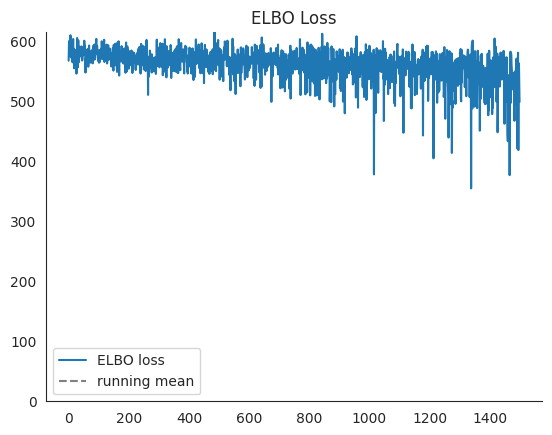

60 140
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 665.9336
[iteration 0050] loss: 652.4176
[iteration 0100] loss: 656.8110
[iteration 0150] loss: 647.7354
[iteration 0200] loss: 642.7792
[iteration 0250] loss: 656.0370
[iteration 0300] loss: 647.9474
[iteration 0350] loss: 648.3984
[iteration 0400] loss: 659.9457
[iteration 0450] loss: 629.5743
[iteration 0500] loss: 642.0493
[iteration 0550] loss: 663.4447
[iteration 0600] loss: 676.2741
[iteration 0650] loss: 645.9132
[iteration 0700] loss: 612.3960
[iteration 0750] loss: 621.9905
[iteration 0800] loss: 623.3359
[iteration 0850] loss: 644.0017
[iteration 0900] loss: 678.4507
[iteration 0950] loss: 629.7581
[iteration 1000] loss: 677.2428
[iteration 1050] loss: 651.0730
[iteration 1100] loss: 643.2953
[iteration 1150] loss: 633.7058
[iteration 1200] loss: 523.0032
[iteration 1250] loss: 602.9470
[iteration 1300] loss: 625.7554
[iteration 1350] loss: 637.3460
[iteration 1400

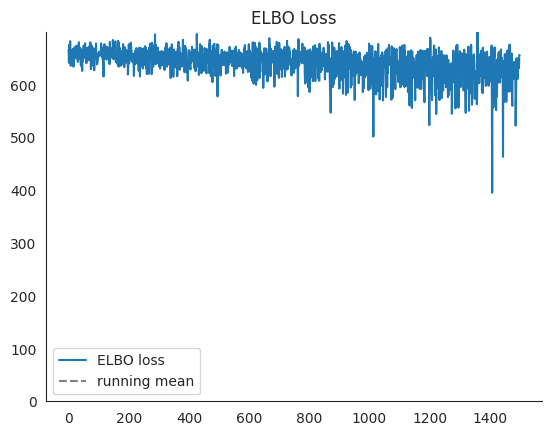

80 81
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 24.5944
[iteration 0050] loss: 25.7643
[iteration 0100] loss: 26.1476
[iteration 0150] loss: 22.9034
[iteration 0200] loss: 18.4556
[iteration 0250] loss: 21.5884
[iteration 0300] loss: 21.1492
[iteration 0350] loss: 18.8480
[iteration 0400] loss: 16.6690
[iteration 0450] loss: 16.3040
[iteration 0500] loss: 17.5240
[iteration 0550] loss: 13.9703
[iteration 0600] loss: 13.4258
[iteration 0650] loss: 13.9298
[iteration 0700] loss: 11.2167
[iteration 0750] loss: 10.0595
[iteration 0800] loss: 13.1262
[iteration 0850] loss: 12.6209
[iteration 0900] loss: 11.5391
[iteration 0950] loss: 11.0177
[iteration 1000] loss: 9.0587
[iteration 1050] loss: 8.2581
[iteration 1100] loss: 6.3886
[iteration 1150] loss: 8.8802
[iteration 1200] loss: 7.6438
[iteration 1250] loss: 9.3358
[iteration 1300] loss: 7.4694
[iteration 1350] loss: 6.0741
[iteration 1400] loss: 8.7271
[iteration 1450] loss:

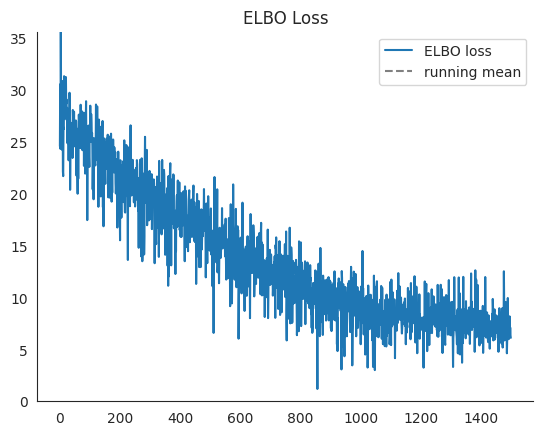

80 82
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 39.7857
[iteration 0050] loss: 32.5014
[iteration 0100] loss: 30.2967
[iteration 0150] loss: 33.9256
[iteration 0200] loss: 27.6963
[iteration 0250] loss: 34.5358
[iteration 0300] loss: 27.0872
[iteration 0350] loss: 25.2523
[iteration 0400] loss: 27.3048
[iteration 0450] loss: 25.6344
[iteration 0500] loss: 21.5789
[iteration 0550] loss: 19.4697
[iteration 0600] loss: 28.2504
[iteration 0650] loss: 23.9702
[iteration 0700] loss: 24.4151
[iteration 0750] loss: 22.6631
[iteration 0800] loss: 13.6206
[iteration 0850] loss: 15.5565
[iteration 0900] loss: 15.7262
[iteration 0950] loss: 16.4850
[iteration 1000] loss: 16.2267
[iteration 1050] loss: 19.0789
[iteration 1100] loss: 16.3220
[iteration 1150] loss: 16.6058
[iteration 1200] loss: 15.9806
[iteration 1250] loss: 16.1247
[iteration 1300] loss: 22.0504
[iteration 1350] loss: 14.9517
[iteration 1400] loss: 14.7180
[iteration 14

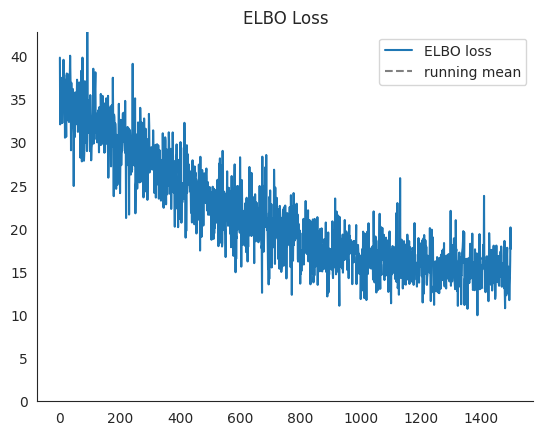

80 83
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 43.2094
[iteration 0050] loss: 46.4723
[iteration 0100] loss: 40.9461
[iteration 0150] loss: 44.1018
[iteration 0200] loss: 38.4795
[iteration 0250] loss: 35.2330
[iteration 0300] loss: 33.0435
[iteration 0350] loss: 36.0635
[iteration 0400] loss: 32.9876
[iteration 0450] loss: 30.0026
[iteration 0500] loss: 30.6619
[iteration 0550] loss: 32.4559
[iteration 0600] loss: 33.1857
[iteration 0650] loss: 27.5682
[iteration 0700] loss: 30.4209
[iteration 0750] loss: 24.5898
[iteration 0800] loss: 26.4803
[iteration 0850] loss: 23.4935
[iteration 0900] loss: 25.3625
[iteration 0950] loss: 22.5266
[iteration 1000] loss: 20.6317
[iteration 1050] loss: 27.8634
[iteration 1100] loss: 22.1662
[iteration 1150] loss: 22.2991
[iteration 1200] loss: 24.3734
[iteration 1250] loss: 25.4116
[iteration 1300] loss: 19.6836
[iteration 1350] loss: 21.0608
[iteration 1400] loss: 23.0132
[iteration 14

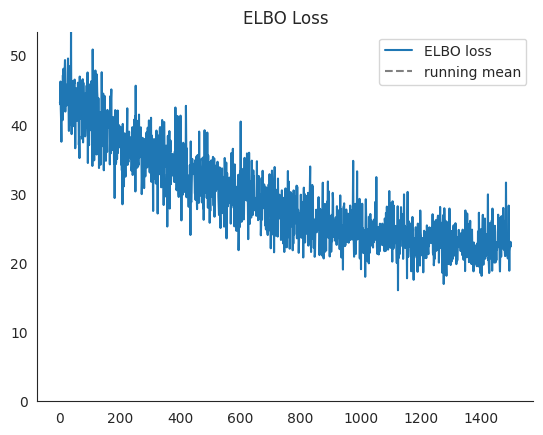

80 84
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 49.8480
[iteration 0050] loss: 47.1463
[iteration 0100] loss: 47.1868
[iteration 0150] loss: 46.3449
[iteration 0200] loss: 44.9036
[iteration 0250] loss: 45.7094
[iteration 0300] loss: 41.6654
[iteration 0350] loss: 42.7944
[iteration 0400] loss: 44.8333
[iteration 0450] loss: 42.8132
[iteration 0500] loss: 39.0205
[iteration 0550] loss: 41.3450
[iteration 0600] loss: 38.8242
[iteration 0650] loss: 45.7981
[iteration 0700] loss: 35.5129
[iteration 0750] loss: 33.5799
[iteration 0800] loss: 44.4885
[iteration 0850] loss: 26.7849
[iteration 0900] loss: 27.0226
[iteration 0950] loss: 33.4984
[iteration 1000] loss: 31.2685
[iteration 1050] loss: 31.6449
[iteration 1100] loss: 36.1367
[iteration 1150] loss: 31.5854
[iteration 1200] loss: 33.7861
[iteration 1250] loss: 33.4190
[iteration 1300] loss: 29.9518
[iteration 1350] loss: 29.9989
[iteration 1400] loss: 27.1203
[iteration 14

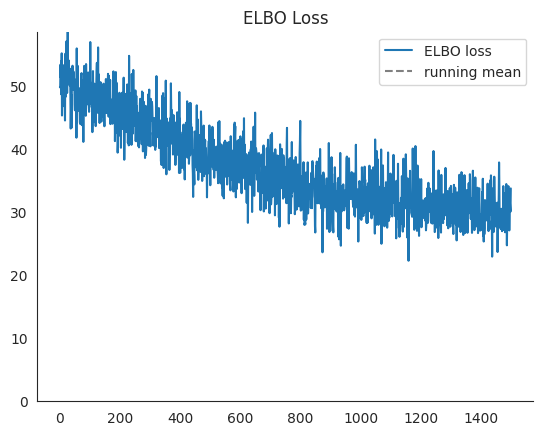

80 85
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 59.3832
[iteration 0050] loss: 57.3527
[iteration 0100] loss: 62.5272
[iteration 0150] loss: 51.8134
[iteration 0200] loss: 53.8352
[iteration 0250] loss: 50.4531
[iteration 0300] loss: 53.4328
[iteration 0350] loss: 47.9795
[iteration 0400] loss: 48.8847
[iteration 0450] loss: 49.3318
[iteration 0500] loss: 51.4904
[iteration 0550] loss: 45.1654
[iteration 0600] loss: 46.5901
[iteration 0650] loss: 43.3671
[iteration 0700] loss: 44.7291
[iteration 0750] loss: 38.0019
[iteration 0800] loss: 36.2118
[iteration 0850] loss: 35.0370
[iteration 0900] loss: 30.8960
[iteration 0950] loss: 37.8833
[iteration 1000] loss: 48.7330
[iteration 1050] loss: 39.6658
[iteration 1100] loss: 42.5759
[iteration 1150] loss: 31.8860
[iteration 1200] loss: 44.0015
[iteration 1250] loss: 37.3034
[iteration 1300] loss: 38.8113
[iteration 1350] loss: 38.2831
[iteration 1400] loss: 37.2498
[iteration 14

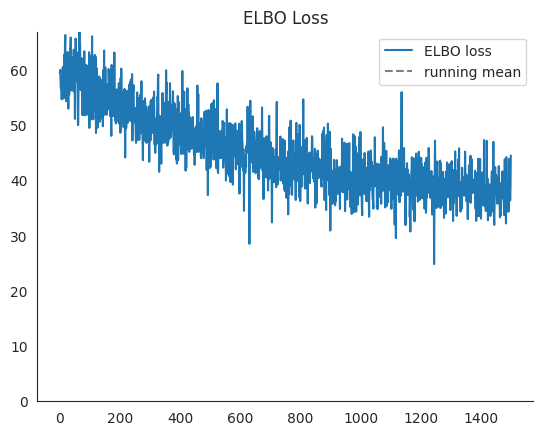

80 86
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 73.8676
[iteration 0050] loss: 64.3591
[iteration 0100] loss: 64.4213
[iteration 0150] loss: 60.6572
[iteration 0200] loss: 59.9532
[iteration 0250] loss: 63.5435
[iteration 0300] loss: 67.7334
[iteration 0350] loss: 58.1894
[iteration 0400] loss: 62.3169
[iteration 0450] loss: 50.8277
[iteration 0500] loss: 51.7897
[iteration 0550] loss: 50.3360
[iteration 0600] loss: 58.1991
[iteration 0650] loss: 53.6807
[iteration 0700] loss: 54.5192
[iteration 0750] loss: 56.3926
[iteration 0800] loss: 56.3449
[iteration 0850] loss: 48.1329
[iteration 0900] loss: 50.5846
[iteration 0950] loss: 50.7361
[iteration 1000] loss: 48.6734
[iteration 1050] loss: 52.7515
[iteration 1100] loss: 45.7729
[iteration 1150] loss: 46.0937
[iteration 1200] loss: 42.5653
[iteration 1250] loss: 43.4233
[iteration 1300] loss: 46.7393
[iteration 1350] loss: 47.4398
[iteration 1400] loss: 44.6498
[iteration 14

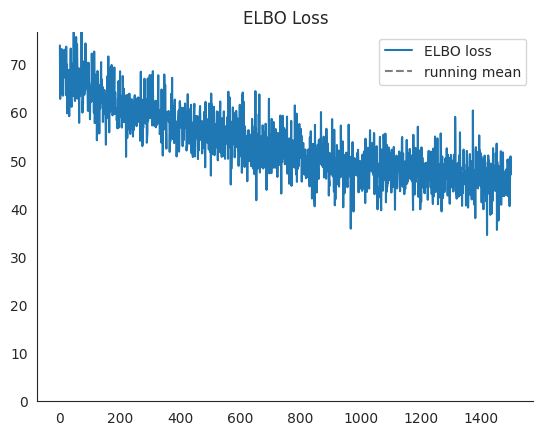

80 87
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 73.6560
[iteration 0050] loss: 71.2493
[iteration 0100] loss: 71.4004
[iteration 0150] loss: 73.4033
[iteration 0200] loss: 69.5931
[iteration 0250] loss: 60.9766
[iteration 0300] loss: 61.3063
[iteration 0350] loss: 67.7269
[iteration 0400] loss: 70.3437
[iteration 0450] loss: 66.3737
[iteration 0500] loss: 64.1149
[iteration 0550] loss: 63.8927
[iteration 0600] loss: 68.2910
[iteration 0650] loss: 63.5069
[iteration 0700] loss: 67.5192
[iteration 0750] loss: 59.0851
[iteration 0800] loss: 53.8417
[iteration 0850] loss: 60.4834
[iteration 0900] loss: 57.1287
[iteration 0950] loss: 71.7402
[iteration 1000] loss: 55.6011
[iteration 1050] loss: 59.6674
[iteration 1100] loss: 60.1913
[iteration 1150] loss: 50.8026
[iteration 1200] loss: 62.2555
[iteration 1250] loss: 55.4479
[iteration 1300] loss: 53.6710
[iteration 1350] loss: 60.3432
[iteration 1400] loss: 50.5157
[iteration 14

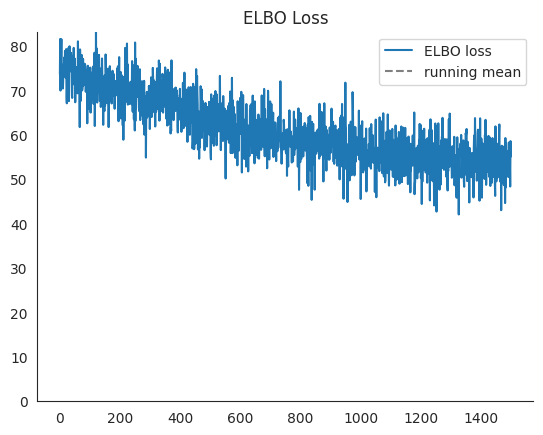

80 88
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 92.5613
[iteration 0050] loss: 84.0182
[iteration 0100] loss: 82.2913
[iteration 0150] loss: 82.1264
[iteration 0200] loss: 79.5289
[iteration 0250] loss: 78.7179
[iteration 0300] loss: 70.9267
[iteration 0350] loss: 72.0865
[iteration 0400] loss: 71.5953
[iteration 0450] loss: 72.4196
[iteration 0500] loss: 71.5598
[iteration 0550] loss: 67.2910
[iteration 0600] loss: 73.5747
[iteration 0650] loss: 68.5730
[iteration 0700] loss: 63.5017
[iteration 0750] loss: 69.4293
[iteration 0800] loss: 64.9595
[iteration 0850] loss: 69.1610
[iteration 0900] loss: 65.9279
[iteration 0950] loss: 58.7742
[iteration 1000] loss: 65.4995
[iteration 1050] loss: 54.3323
[iteration 1100] loss: 65.7102
[iteration 1150] loss: 60.4110
[iteration 1200] loss: 62.5236
[iteration 1250] loss: 56.9685
[iteration 1300] loss: 64.0234
[iteration 1350] loss: 60.0283
[iteration 1400] loss: 58.7891
[iteration 14

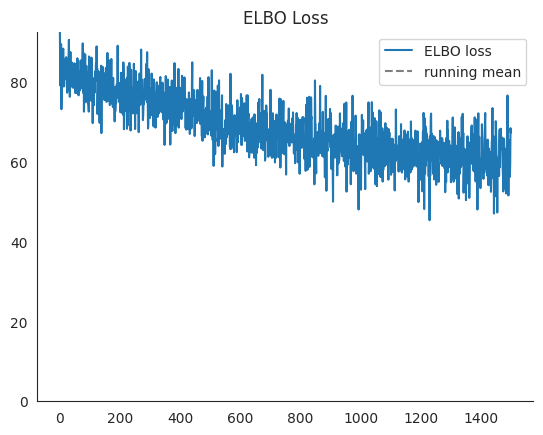

80 89
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 96.7178
[iteration 0050] loss: 89.1980
[iteration 0100] loss: 87.8644
[iteration 0150] loss: 83.6364
[iteration 0200] loss: 88.8345
[iteration 0250] loss: 85.6872
[iteration 0300] loss: 91.0637
[iteration 0350] loss: 82.3995
[iteration 0400] loss: 74.5184
[iteration 0450] loss: 78.9087
[iteration 0500] loss: 80.5166
[iteration 0550] loss: 76.1533
[iteration 0600] loss: 82.8150
[iteration 0650] loss: 74.8396
[iteration 0700] loss: 78.3084
[iteration 0750] loss: 72.0217
[iteration 0800] loss: 68.8781
[iteration 0850] loss: 71.6071
[iteration 0900] loss: 77.6445
[iteration 0950] loss: 74.1964
[iteration 1000] loss: 71.3785
[iteration 1050] loss: 69.3644
[iteration 1100] loss: 76.2377
[iteration 1150] loss: 70.9378
[iteration 1200] loss: 59.5383
[iteration 1250] loss: 67.5953
[iteration 1300] loss: 72.8943
[iteration 1350] loss: 70.5060
[iteration 1400] loss: 72.0240
[iteration 14

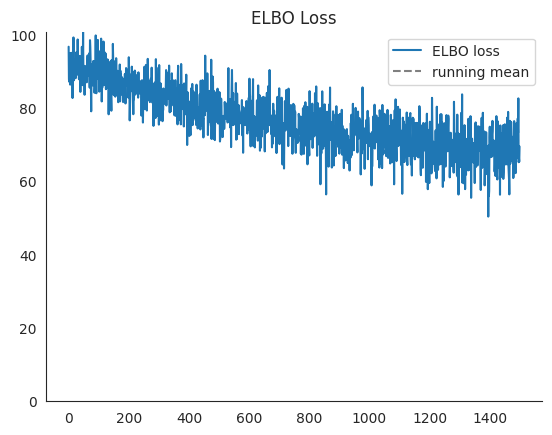

80 90
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 89.6132
[iteration 0050] loss: 103.1151
[iteration 0100] loss: 101.0982
[iteration 0150] loss: 103.2828
[iteration 0200] loss: 96.9361
[iteration 0250] loss: 90.8709
[iteration 0300] loss: 92.4599
[iteration 0350] loss: 89.6466
[iteration 0400] loss: 99.2645
[iteration 0450] loss: 91.1811
[iteration 0500] loss: 86.8117
[iteration 0550] loss: 87.9820
[iteration 0600] loss: 83.2573
[iteration 0650] loss: 85.1023
[iteration 0700] loss: 81.6565
[iteration 0750] loss: 80.6877
[iteration 0800] loss: 88.7087
[iteration 0850] loss: 78.8189
[iteration 0900] loss: 83.3935
[iteration 0950] loss: 76.0796
[iteration 1000] loss: 85.4205
[iteration 1050] loss: 76.0678
[iteration 1100] loss: 70.6870
[iteration 1150] loss: 77.3678
[iteration 1200] loss: 72.4632
[iteration 1250] loss: 89.6856
[iteration 1300] loss: 77.8282
[iteration 1350] loss: 76.5176
[iteration 1400] loss: 76.5531
[iteration

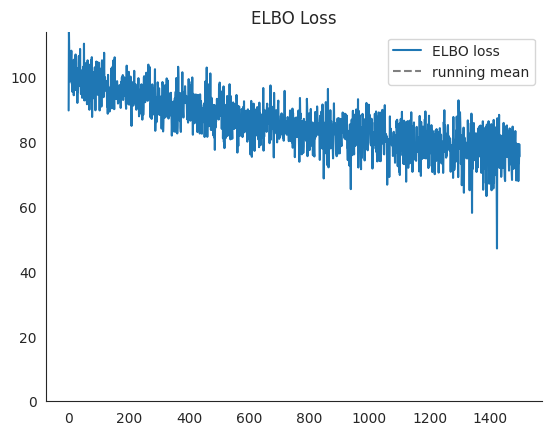

80 91
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 105.8159
[iteration 0050] loss: 99.9874
[iteration 0100] loss: 101.3429
[iteration 0150] loss: 107.3716
[iteration 0200] loss: 113.4277
[iteration 0250] loss: 103.1823
[iteration 0300] loss: 100.1706
[iteration 0350] loss: 101.4116
[iteration 0400] loss: 88.1289
[iteration 0450] loss: 92.6667
[iteration 0500] loss: 98.1405
[iteration 0550] loss: 104.2827
[iteration 0600] loss: 91.5907
[iteration 0650] loss: 102.6115
[iteration 0700] loss: 82.6572
[iteration 0750] loss: 96.4679
[iteration 0800] loss: 85.6268
[iteration 0850] loss: 81.5413
[iteration 0900] loss: 84.8318
[iteration 0950] loss: 90.9371
[iteration 1000] loss: 84.2981
[iteration 1050] loss: 87.2128
[iteration 1100] loss: 80.0975
[iteration 1150] loss: 93.6758
[iteration 1200] loss: 81.5827
[iteration 1250] loss: 94.9847
[iteration 1300] loss: 88.0347
[iteration 1350] loss: 69.2128
[iteration 1400] loss: 87.0394
[ite

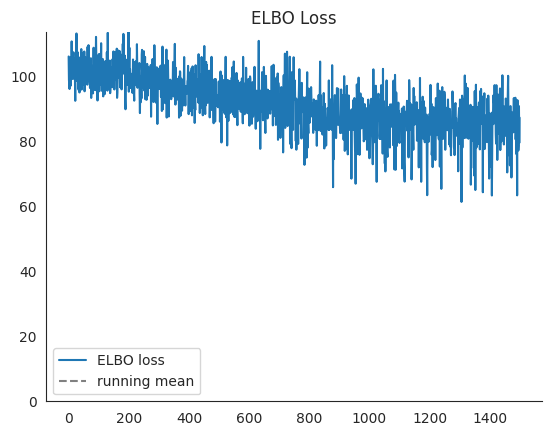

80 92
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 104.5704
[iteration 0050] loss: 106.9170
[iteration 0100] loss: 105.4666
[iteration 0150] loss: 104.0377
[iteration 0200] loss: 110.7444
[iteration 0250] loss: 118.5897
[iteration 0300] loss: 104.1008
[iteration 0350] loss: 106.5774
[iteration 0400] loss: 101.9790
[iteration 0450] loss: 101.2637
[iteration 0500] loss: 99.9844
[iteration 0550] loss: 93.1164
[iteration 0600] loss: 113.9157
[iteration 0650] loss: 97.5905
[iteration 0700] loss: 99.6915
[iteration 0750] loss: 94.1313
[iteration 0800] loss: 98.2880
[iteration 0850] loss: 88.8625
[iteration 0900] loss: 92.5049
[iteration 0950] loss: 93.2974
[iteration 1000] loss: 96.2064
[iteration 1050] loss: 91.4822
[iteration 1100] loss: 97.9516
[iteration 1150] loss: 98.6377
[iteration 1200] loss: 104.8299
[iteration 1250] loss: 97.4008
[iteration 1300] loss: 91.0580
[iteration 1350] loss: 98.2724
[iteration 1400] loss: 86.1802
[

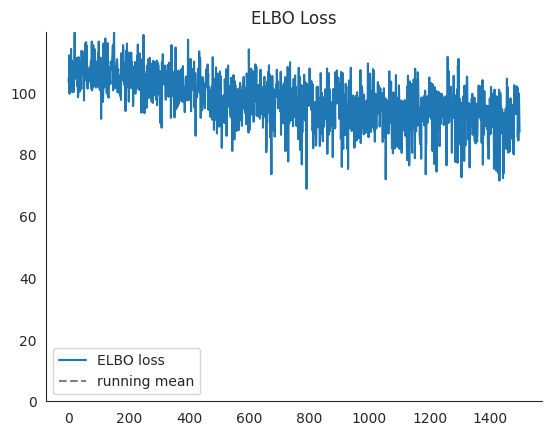

80 93
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 124.5045
[iteration 0050] loss: 120.3282
[iteration 0100] loss: 111.4549
[iteration 0150] loss: 121.6885
[iteration 0200] loss: 118.1010
[iteration 0250] loss: 113.6840
[iteration 0300] loss: 114.2822
[iteration 0350] loss: 115.8222
[iteration 0400] loss: 115.1650
[iteration 0450] loss: 126.3932
[iteration 0500] loss: 105.8834
[iteration 0550] loss: 114.2782
[iteration 0600] loss: 109.7086
[iteration 0650] loss: 117.6147
[iteration 0700] loss: 103.1165
[iteration 0750] loss: 102.4611
[iteration 0800] loss: 105.2452
[iteration 0850] loss: 101.0408
[iteration 0900] loss: 103.1712
[iteration 0950] loss: 102.2076
[iteration 1000] loss: 116.2335
[iteration 1050] loss: 120.7219
[iteration 1100] loss: 111.0625
[iteration 1150] loss: 118.3050
[iteration 1200] loss: 107.7718
[iteration 1250] loss: 106.8363
[iteration 1300] loss: 112.4594
[iteration 1350] loss: 104.0535
[iteration 1400]

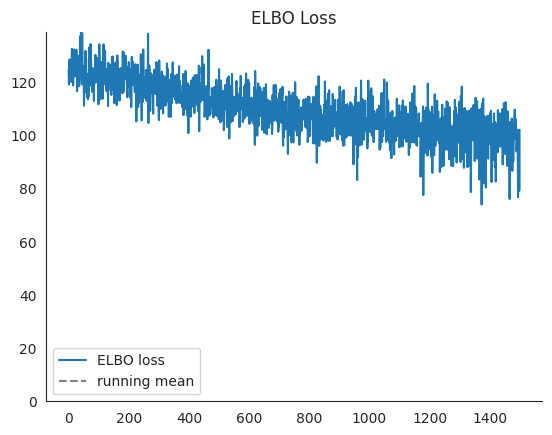

80 94
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 125.6512
[iteration 0050] loss: 128.6843
[iteration 0100] loss: 132.1453
[iteration 0150] loss: 120.4696
[iteration 0200] loss: 129.9562
[iteration 0250] loss: 127.0520
[iteration 0300] loss: 124.0659
[iteration 0350] loss: 116.4625
[iteration 0400] loss: 127.0439
[iteration 0450] loss: 111.2079
[iteration 0500] loss: 115.7733
[iteration 0550] loss: 127.0908
[iteration 0600] loss: 112.7821
[iteration 0650] loss: 113.1952
[iteration 0700] loss: 114.8710
[iteration 0750] loss: 116.8885
[iteration 0800] loss: 106.0609
[iteration 0850] loss: 116.5253
[iteration 0900] loss: 102.9933
[iteration 0950] loss: 115.5425
[iteration 1000] loss: 103.4402
[iteration 1050] loss: 110.9399
[iteration 1100] loss: 107.2345
[iteration 1150] loss: 106.6388
[iteration 1200] loss: 114.0087
[iteration 1250] loss: 116.2780
[iteration 1300] loss: 111.7783
[iteration 1350] loss: 113.1231
[iteration 1400]

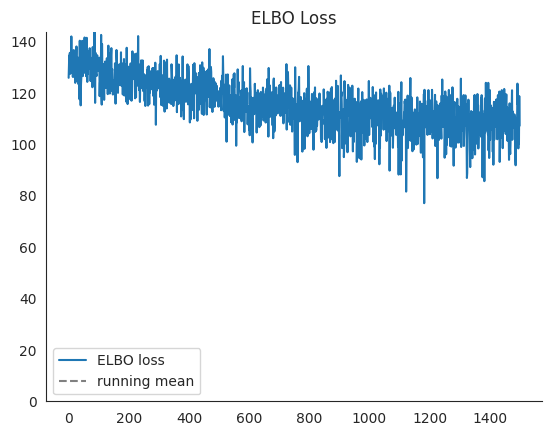

80 95
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 151.6772
[iteration 0050] loss: 144.2056
[iteration 0100] loss: 130.7595
[iteration 0150] loss: 138.7539
[iteration 0200] loss: 143.4723
[iteration 0250] loss: 141.7530
[iteration 0300] loss: 140.3657
[iteration 0350] loss: 128.3410
[iteration 0400] loss: 131.9302
[iteration 0450] loss: 140.9943
[iteration 0500] loss: 135.0573
[iteration 0550] loss: 126.3757
[iteration 0600] loss: 122.0448
[iteration 0650] loss: 128.9844
[iteration 0700] loss: 126.9543
[iteration 0750] loss: 114.4883
[iteration 0800] loss: 122.1607
[iteration 0850] loss: 126.9239
[iteration 0900] loss: 119.6017
[iteration 0950] loss: 131.3438
[iteration 1000] loss: 106.1310
[iteration 1050] loss: 115.6139
[iteration 1100] loss: 123.8962
[iteration 1150] loss: 120.4280
[iteration 1200] loss: 118.1365
[iteration 1250] loss: 122.4384
[iteration 1300] loss: 111.6980
[iteration 1350] loss: 108.3125
[iteration 1400]

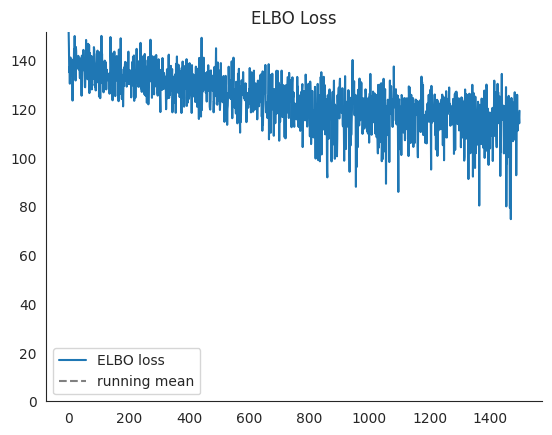

80 100
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 169.8370
[iteration 0050] loss: 161.4858
[iteration 0100] loss: 155.4263
[iteration 0150] loss: 164.8732
[iteration 0200] loss: 164.2541
[iteration 0250] loss: 169.9637
[iteration 0300] loss: 159.4514
[iteration 0350] loss: 159.8451
[iteration 0400] loss: 167.8378
[iteration 0450] loss: 143.3744
[iteration 0500] loss: 166.5552
[iteration 0550] loss: 162.6596
[iteration 0600] loss: 163.9712
[iteration 0650] loss: 159.7936
[iteration 0700] loss: 159.6770
[iteration 0750] loss: 163.9506
[iteration 0800] loss: 148.5054
[iteration 0850] loss: 171.0000
[iteration 0900] loss: 158.6500
[iteration 0950] loss: 149.2804
[iteration 1000] loss: 163.7267
[iteration 1050] loss: 131.0137
[iteration 1100] loss: 161.6624
[iteration 1150] loss: 172.9251
[iteration 1200] loss: 127.7854
[iteration 1250] loss: 155.1535
[iteration 1300] loss: 104.8306
[iteration 1350] loss: 145.2054
[iteration 1400

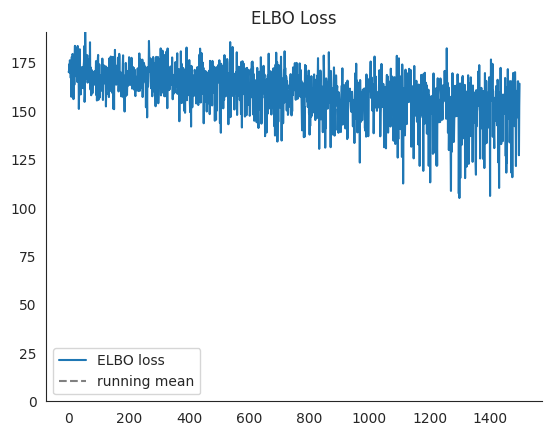

80 110
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 251.1356
[iteration 0050] loss: 253.3877
[iteration 0100] loss: 254.6184
[iteration 0150] loss: 240.3957
[iteration 0200] loss: 256.3681
[iteration 0250] loss: 236.8067
[iteration 0300] loss: 262.2240
[iteration 0350] loss: 253.5130
[iteration 0400] loss: 244.0509
[iteration 0450] loss: 246.8083
[iteration 0500] loss: 236.3593
[iteration 0550] loss: 258.1426
[iteration 0600] loss: 233.8745
[iteration 0650] loss: 255.9370
[iteration 0700] loss: 247.0298
[iteration 0750] loss: 251.9419
[iteration 0800] loss: 248.5657
[iteration 0850] loss: 236.9400
[iteration 0900] loss: 241.8568
[iteration 0950] loss: 267.9005
[iteration 1000] loss: 228.4215
[iteration 1050] loss: 217.9186
[iteration 1100] loss: 212.9406
[iteration 1150] loss: 231.3003
[iteration 1200] loss: 220.7625
[iteration 1250] loss: 253.4297
[iteration 1300] loss: 218.7775
[iteration 1350] loss: 240.0350
[iteration 1400

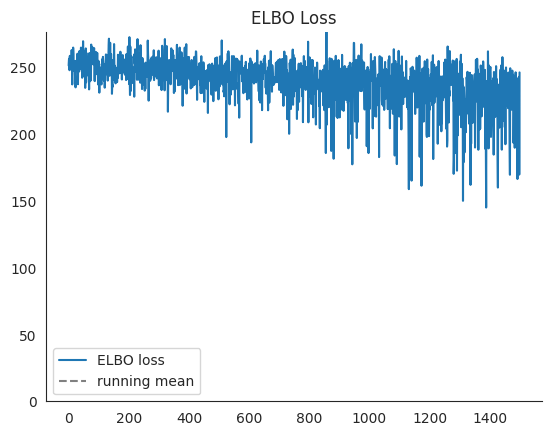

80 120
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 286.2639
[iteration 0050] loss: 272.8766
[iteration 0100] loss: 269.3260
[iteration 0150] loss: 285.3013
[iteration 0200] loss: 247.3623
[iteration 0250] loss: 283.9599
[iteration 0300] loss: 292.2833
[iteration 0350] loss: 285.4295
[iteration 0400] loss: 290.9807
[iteration 0450] loss: 316.6713
[iteration 0500] loss: 320.0402
[iteration 0550] loss: 282.9490
[iteration 0600] loss: 269.4417
[iteration 0650] loss: 219.0692
[iteration 0700] loss: 234.3056
[iteration 0750] loss: 252.0008
[iteration 0800] loss: 279.1239
[iteration 0850] loss: 268.0658
[iteration 0900] loss: 295.2650
[iteration 0950] loss: 271.7244
[iteration 1000] loss: 234.1854
[iteration 1050] loss: 282.3665
[iteration 1100] loss: 264.4986
[iteration 1150] loss: 292.4446
[iteration 1200] loss: 258.3784
[iteration 1250] loss: 269.5578
[iteration 1300] loss: 268.4945
[iteration 1350] loss: 253.1431
[iteration 1400

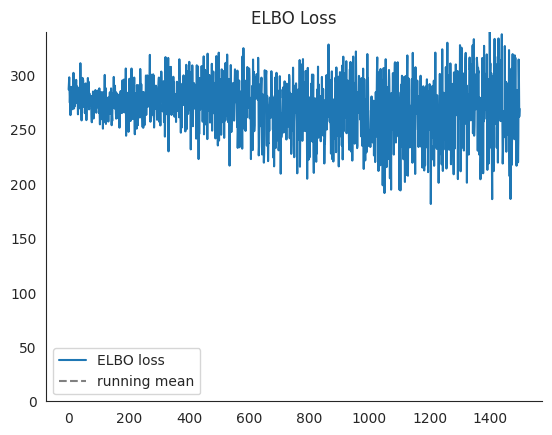

80 130
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 427.2293
[iteration 0050] loss: 423.4783
[iteration 0100] loss: 436.2991
[iteration 0150] loss: 405.1768
[iteration 0200] loss: 425.6882
[iteration 0250] loss: 417.1165
[iteration 0300] loss: 424.8730
[iteration 0350] loss: 404.3017
[iteration 0400] loss: 417.4366
[iteration 0450] loss: 392.7551
[iteration 0500] loss: 392.8802
[iteration 0550] loss: 410.9663
[iteration 0600] loss: 399.9651
[iteration 0650] loss: 409.8242
[iteration 0700] loss: 407.0852
[iteration 0750] loss: 356.4932
[iteration 0800] loss: 390.9074
[iteration 0850] loss: 423.1684
[iteration 0900] loss: 413.6626
[iteration 0950] loss: 426.5455
[iteration 1000] loss: 396.0533
[iteration 1050] loss: 395.3481
[iteration 1100] loss: 394.1661
[iteration 1150] loss: 405.4739
[iteration 1200] loss: 417.1085
[iteration 1250] loss: 397.9038
[iteration 1300] loss: 393.7582
[iteration 1350] loss: 383.2326
[iteration 1400

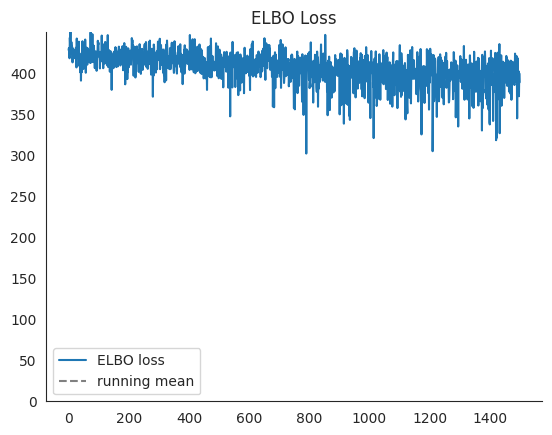

80 140
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 513.7943
[iteration 0050] loss: 505.5231
[iteration 0100] loss: 495.8729
[iteration 0150] loss: 507.1313
[iteration 0200] loss: 514.6604
[iteration 0250] loss: 509.8223
[iteration 0300] loss: 502.3472
[iteration 0350] loss: 494.4681
[iteration 0400] loss: 519.4342
[iteration 0450] loss: 499.8836
[iteration 0500] loss: 476.5203
[iteration 0550] loss: 495.2552
[iteration 0600] loss: 501.9639
[iteration 0650] loss: 499.1734
[iteration 0700] loss: 495.4532
[iteration 0750] loss: 499.6718
[iteration 0800] loss: 488.4684
[iteration 0850] loss: 464.4869
[iteration 0900] loss: 509.4620
[iteration 0950] loss: 492.8130
[iteration 1000] loss: 422.1275
[iteration 1050] loss: 498.0587
[iteration 1100] loss: 489.7720
[iteration 1150] loss: 487.3404
[iteration 1200] loss: 494.1233
[iteration 1250] loss: 491.7223
[iteration 1300] loss: 480.1370
[iteration 1350] loss: 499.9256
[iteration 1400

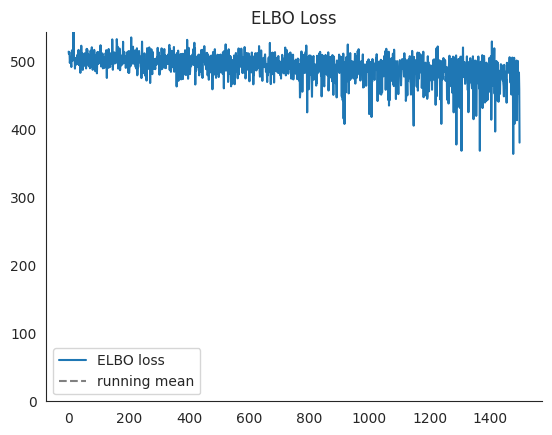

80 150
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 596.5214
[iteration 0050] loss: 583.8917
[iteration 0100] loss: 570.9152
[iteration 0150] loss: 576.1026
[iteration 0200] loss: 582.2885
[iteration 0250] loss: 582.5085
[iteration 0300] loss: 576.4607
[iteration 0350] loss: 577.3222
[iteration 0400] loss: 579.2213
[iteration 0450] loss: 576.3731
[iteration 0500] loss: 583.9402
[iteration 0550] loss: 604.9263
[iteration 0600] loss: 561.4648
[iteration 0650] loss: 555.8303
[iteration 0700] loss: 555.7002
[iteration 0750] loss: 559.3530
[iteration 0800] loss: 565.3557
[iteration 0850] loss: 537.7752
[iteration 0900] loss: 566.2485
[iteration 0950] loss: 578.2088
[iteration 1000] loss: 539.3847
[iteration 1050] loss: 563.0151
[iteration 1100] loss: 550.6856
[iteration 1150] loss: 556.0729
[iteration 1200] loss: 559.0929
[iteration 1250] loss: 542.8948
[iteration 1300] loss: 567.2115
[iteration 1350] loss: 556.7539
[iteration 1400

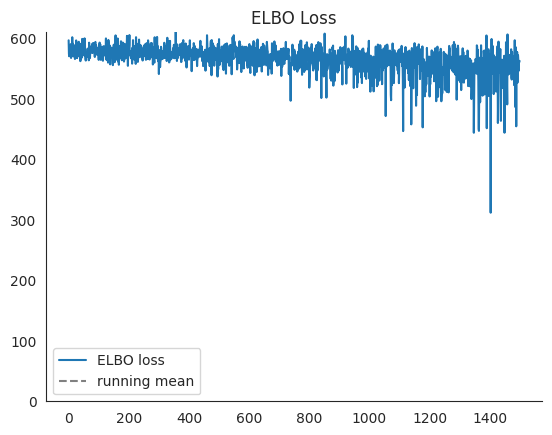

80 160
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 673.7939
[iteration 0050] loss: 649.2717
[iteration 0100] loss: 654.0850
[iteration 0150] loss: 656.2837
[iteration 0200] loss: 655.1209
[iteration 0250] loss: 636.6202
[iteration 0300] loss: 667.3152
[iteration 0350] loss: 618.2545
[iteration 0400] loss: 661.6107
[iteration 0450] loss: 636.3291
[iteration 0500] loss: 614.3877
[iteration 0550] loss: 642.6835
[iteration 0600] loss: 654.5739
[iteration 0650] loss: 658.9638
[iteration 0700] loss: 637.7739
[iteration 0750] loss: 644.1326
[iteration 0800] loss: 649.6002
[iteration 0850] loss: 670.7481
[iteration 0900] loss: 642.7660
[iteration 0950] loss: 654.2841
[iteration 1000] loss: 639.4572
[iteration 1050] loss: 624.0801
[iteration 1100] loss: 663.4180
[iteration 1150] loss: 634.1992
[iteration 1200] loss: 610.3302
[iteration 1250] loss: 517.9264
[iteration 1300] loss: 662.6338
[iteration 1350] loss: 624.2701
[iteration 1400

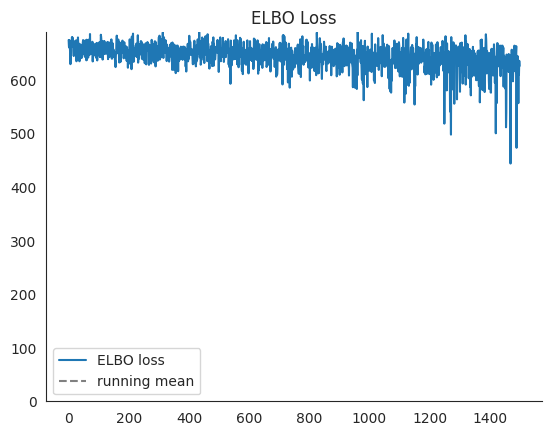

100 101
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 31.4208
[iteration 0050] loss: 25.7127
[iteration 0100] loss: 24.9000
[iteration 0150] loss: 25.5304
[iteration 0200] loss: 22.2087
[iteration 0250] loss: 23.2886
[iteration 0300] loss: 21.9597
[iteration 0350] loss: 20.8503
[iteration 0400] loss: 18.7504
[iteration 0450] loss: 17.4090
[iteration 0500] loss: 17.6198
[iteration 0550] loss: 13.1810
[iteration 0600] loss: 14.2604
[iteration 0650] loss: 10.8523
[iteration 0700] loss: 14.6202
[iteration 0750] loss: 12.6705
[iteration 0800] loss: 9.9646
[iteration 0850] loss: 10.3456
[iteration 0900] loss: 11.6310
[iteration 0950] loss: 12.1039
[iteration 1000] loss: 10.1602
[iteration 1050] loss: 10.6147
[iteration 1100] loss: 8.4129
[iteration 1150] loss: 9.9236
[iteration 1200] loss: 10.6075
[iteration 1250] loss: 11.0102
[iteration 1300] loss: 8.5275
[iteration 1350] loss: 9.9929
[iteration 1400] loss: 8.7054
[iteration 1450] 

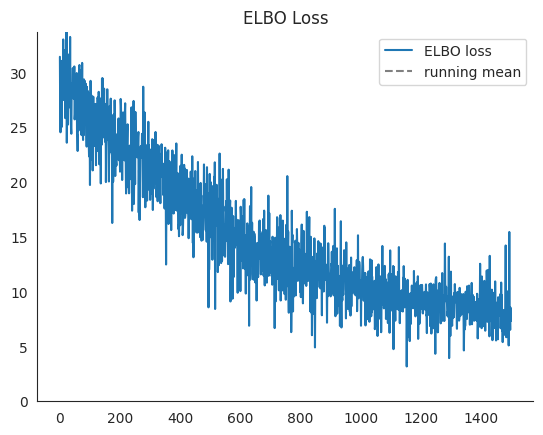

100 102
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 32.3233
[iteration 0050] loss: 37.1814
[iteration 0100] loss: 34.5713
[iteration 0150] loss: 32.0049
[iteration 0200] loss: 32.1878
[iteration 0250] loss: 26.5783
[iteration 0300] loss: 33.5928
[iteration 0350] loss: 31.0096
[iteration 0400] loss: 31.4047
[iteration 0450] loss: 22.0289
[iteration 0500] loss: 25.5289
[iteration 0550] loss: 27.1207
[iteration 0600] loss: 26.4413
[iteration 0650] loss: 27.0938
[iteration 0700] loss: 21.0896
[iteration 0750] loss: 20.6410
[iteration 0800] loss: 24.1601
[iteration 0850] loss: 25.3983
[iteration 0900] loss: 12.2538
[iteration 0950] loss: 22.9095
[iteration 1000] loss: 18.5500
[iteration 1050] loss: 15.7250
[iteration 1100] loss: 17.5631
[iteration 1150] loss: 14.0990
[iteration 1200] loss: 18.4586
[iteration 1250] loss: 14.0012
[iteration 1300] loss: 14.2167
[iteration 1350] loss: 16.6535
[iteration 1400] loss: 19.9450
[iteration 

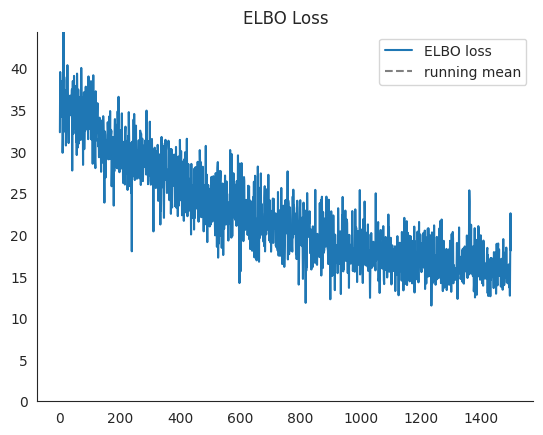

100 103
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 43.4254
[iteration 0050] loss: 43.0736
[iteration 0100] loss: 48.2499
[iteration 0150] loss: 38.3725
[iteration 0200] loss: 38.1583
[iteration 0250] loss: 35.8851
[iteration 0300] loss: 32.8332
[iteration 0350] loss: 37.2308
[iteration 0400] loss: 34.7836
[iteration 0450] loss: 34.7877
[iteration 0500] loss: 34.3014
[iteration 0550] loss: 34.3815
[iteration 0600] loss: 26.5241
[iteration 0650] loss: 32.7310
[iteration 0700] loss: 26.0255
[iteration 0750] loss: 23.1578
[iteration 0800] loss: 28.0171
[iteration 0850] loss: 26.2245
[iteration 0900] loss: 21.4633
[iteration 0950] loss: 24.1926
[iteration 1000] loss: 23.9600
[iteration 1050] loss: 25.9657
[iteration 1100] loss: 23.8258
[iteration 1150] loss: 26.8485
[iteration 1200] loss: 25.4054
[iteration 1250] loss: 22.2042
[iteration 1300] loss: 23.0537
[iteration 1350] loss: 21.0380
[iteration 1400] loss: 22.7103
[iteration 

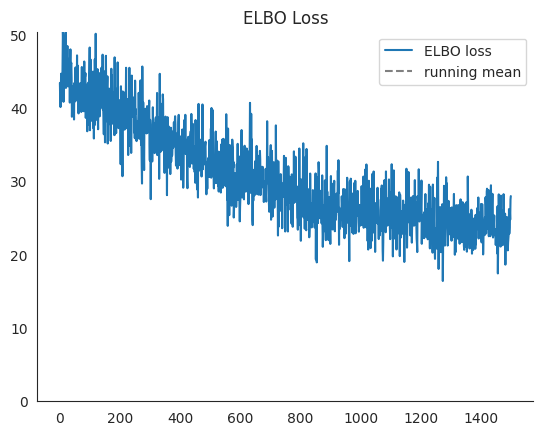

100 104
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 59.4122
[iteration 0050] loss: 50.9118
[iteration 0100] loss: 57.3401
[iteration 0150] loss: 49.3948
[iteration 0200] loss: 47.0594
[iteration 0250] loss: 51.8039
[iteration 0300] loss: 42.3284
[iteration 0350] loss: 43.8733
[iteration 0400] loss: 44.5913
[iteration 0450] loss: 37.9855
[iteration 0500] loss: 45.1864
[iteration 0550] loss: 38.7529
[iteration 0600] loss: 34.9965
[iteration 0650] loss: 36.5487
[iteration 0700] loss: 38.8131
[iteration 0750] loss: 33.3187
[iteration 0800] loss: 29.7195
[iteration 0850] loss: 38.4615
[iteration 0900] loss: 35.4503
[iteration 0950] loss: 32.3253
[iteration 1000] loss: 41.3593
[iteration 1050] loss: 32.9534
[iteration 1100] loss: 32.8336
[iteration 1150] loss: 34.6325
[iteration 1200] loss: 32.9369
[iteration 1250] loss: 31.4923
[iteration 1300] loss: 32.9538
[iteration 1350] loss: 31.8801
[iteration 1400] loss: 30.1784
[iteration 

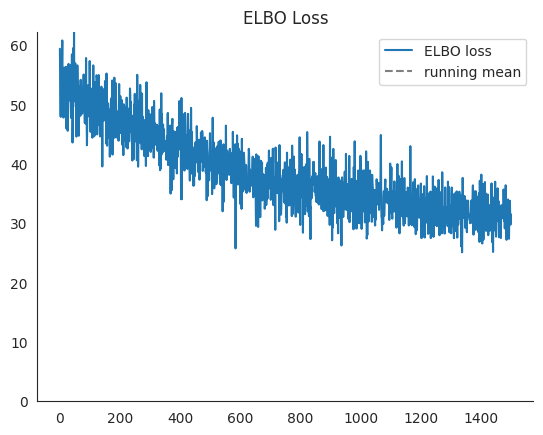

100 105
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 55.1936
[iteration 0050] loss: 58.2785
[iteration 0100] loss: 52.8180
[iteration 0150] loss: 54.8367
[iteration 0200] loss: 55.7678
[iteration 0250] loss: 47.7296
[iteration 0300] loss: 47.2243
[iteration 0350] loss: 49.4324
[iteration 0400] loss: 52.7532
[iteration 0450] loss: 47.2475
[iteration 0500] loss: 51.4344
[iteration 0550] loss: 49.5220
[iteration 0600] loss: 45.5051
[iteration 0650] loss: 45.2526
[iteration 0700] loss: 46.8770
[iteration 0750] loss: 46.5318
[iteration 0800] loss: 45.5875
[iteration 0850] loss: 43.9024
[iteration 0900] loss: 43.0693
[iteration 0950] loss: 39.3233
[iteration 1000] loss: 40.4233
[iteration 1050] loss: 41.2572
[iteration 1100] loss: 42.4229
[iteration 1150] loss: 42.0668
[iteration 1200] loss: 40.8570
[iteration 1250] loss: 40.7318
[iteration 1300] loss: 40.8421
[iteration 1350] loss: 37.4595
[iteration 1400] loss: 43.1097
[iteration 

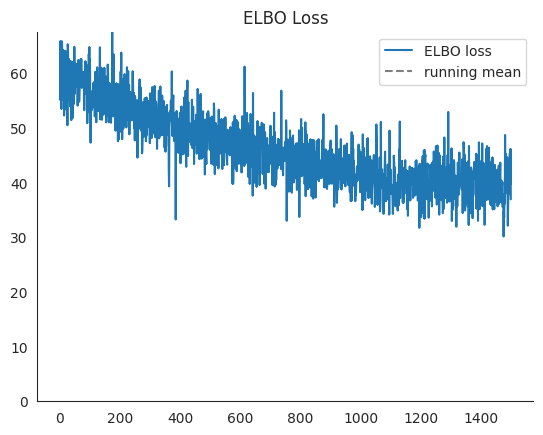

100 106
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 66.1437
[iteration 0050] loss: 66.9252
[iteration 0100] loss: 66.5684
[iteration 0150] loss: 77.6662
[iteration 0200] loss: 66.3318
[iteration 0250] loss: 58.0459
[iteration 0300] loss: 55.8609
[iteration 0350] loss: 59.4990
[iteration 0400] loss: 65.0923
[iteration 0450] loss: 56.5970
[iteration 0500] loss: 54.7770
[iteration 0550] loss: 53.1357
[iteration 0600] loss: 57.7596
[iteration 0650] loss: 53.8149
[iteration 0700] loss: 47.3061
[iteration 0750] loss: 43.4220
[iteration 0800] loss: 53.1213
[iteration 0850] loss: 48.9297
[iteration 0900] loss: 41.1701
[iteration 0950] loss: 50.8633
[iteration 1000] loss: 47.2987
[iteration 1050] loss: 47.5551
[iteration 1100] loss: 46.2857
[iteration 1150] loss: 47.3811
[iteration 1200] loss: 40.6841
[iteration 1250] loss: 48.3410
[iteration 1300] loss: 49.6488
[iteration 1350] loss: 50.7211
[iteration 1400] loss: 52.8984
[iteration 

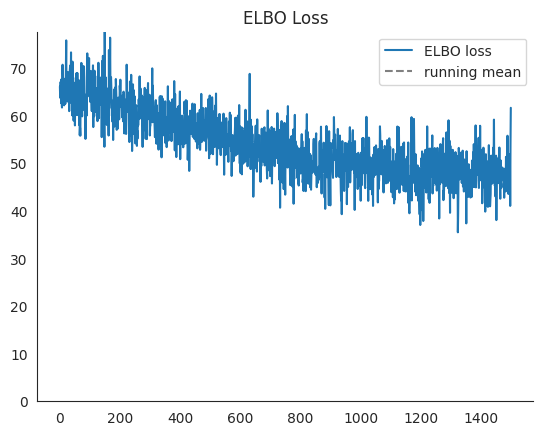

100 107
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 75.9471
[iteration 0050] loss: 75.0934
[iteration 0100] loss: 73.7118
[iteration 0150] loss: 67.6517
[iteration 0200] loss: 69.0538
[iteration 0250] loss: 64.4462
[iteration 0300] loss: 73.8865
[iteration 0350] loss: 60.5486
[iteration 0400] loss: 66.9970
[iteration 0450] loss: 66.0651
[iteration 0500] loss: 59.2081
[iteration 0550] loss: 60.1912
[iteration 0600] loss: 66.4097
[iteration 0650] loss: 63.7071
[iteration 0700] loss: 66.4837
[iteration 0750] loss: 56.8284
[iteration 0800] loss: 61.2361
[iteration 0850] loss: 52.5873
[iteration 0900] loss: 63.5794
[iteration 0950] loss: 61.3560
[iteration 1000] loss: 57.4802
[iteration 1050] loss: 50.6641
[iteration 1100] loss: 58.4445
[iteration 1150] loss: 51.2646
[iteration 1200] loss: 57.4265
[iteration 1250] loss: 52.0761
[iteration 1300] loss: 55.5528
[iteration 1350] loss: 52.9647
[iteration 1400] loss: 58.1865
[iteration 

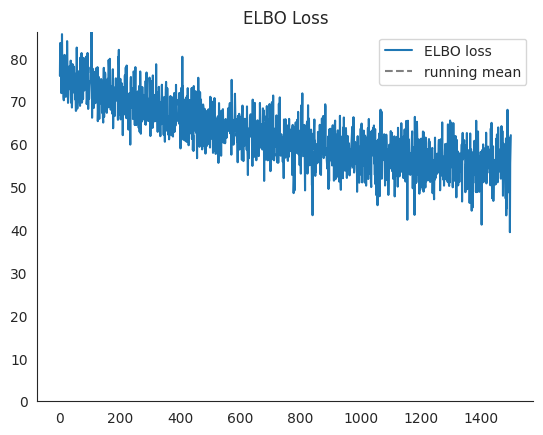

100 108
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 84.2221
[iteration 0050] loss: 85.1002
[iteration 0100] loss: 80.7205
[iteration 0150] loss: 86.0973
[iteration 0200] loss: 83.0110
[iteration 0250] loss: 79.6972
[iteration 0300] loss: 73.3623
[iteration 0350] loss: 70.5114
[iteration 0400] loss: 76.2639
[iteration 0450] loss: 77.7421
[iteration 0500] loss: 73.8888
[iteration 0550] loss: 70.8174
[iteration 0600] loss: 63.5242
[iteration 0650] loss: 74.2653
[iteration 0700] loss: 67.8268
[iteration 0750] loss: 70.8400
[iteration 0800] loss: 69.5047
[iteration 0850] loss: 72.6993
[iteration 0900] loss: 65.5500
[iteration 0950] loss: 68.3294
[iteration 1000] loss: 65.9762
[iteration 1050] loss: 61.4736
[iteration 1100] loss: 61.9884
[iteration 1150] loss: 57.7559
[iteration 1200] loss: 66.2943
[iteration 1250] loss: 64.7330
[iteration 1300] loss: 68.3433
[iteration 1350] loss: 61.5121
[iteration 1400] loss: 67.5694
[iteration 

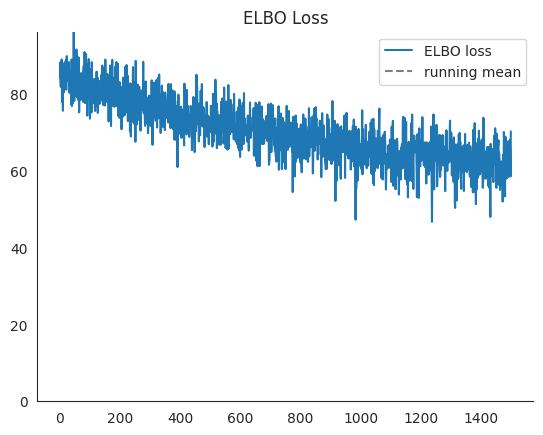

100 109
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 98.2686
[iteration 0050] loss: 94.4172
[iteration 0100] loss: 93.7033
[iteration 0150] loss: 88.5121
[iteration 0200] loss: 88.6486
[iteration 0250] loss: 79.6215
[iteration 0300] loss: 92.8498
[iteration 0350] loss: 89.3243
[iteration 0400] loss: 87.0749
[iteration 0450] loss: 87.1345
[iteration 0500] loss: 87.7842
[iteration 0550] loss: 73.7230
[iteration 0600] loss: 78.7941
[iteration 0650] loss: 72.9050
[iteration 0700] loss: 79.6140
[iteration 0750] loss: 75.8687
[iteration 0800] loss: 82.2901
[iteration 0850] loss: 72.9331
[iteration 0900] loss: 79.4330
[iteration 0950] loss: 74.6274
[iteration 1000] loss: 74.7554
[iteration 1050] loss: 80.7544
[iteration 1100] loss: 70.9157
[iteration 1150] loss: 69.2979
[iteration 1200] loss: 65.8501
[iteration 1250] loss: 64.8419
[iteration 1300] loss: 70.3264
[iteration 1350] loss: 76.5624
[iteration 1400] loss: 68.2182
[iteration 

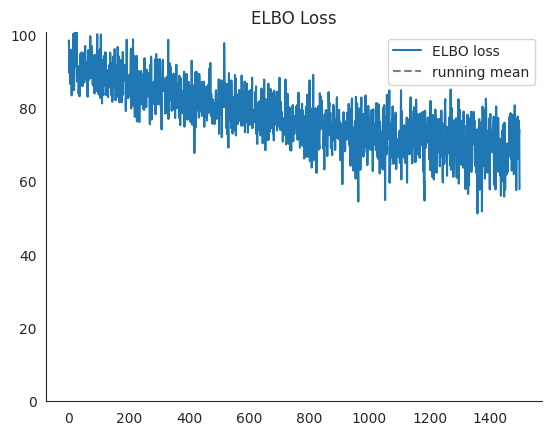

100 110
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 91.6628
[iteration 0050] loss: 100.7185
[iteration 0100] loss: 94.3091
[iteration 0150] loss: 97.9777
[iteration 0200] loss: 93.0503
[iteration 0250] loss: 94.6489
[iteration 0300] loss: 90.1194
[iteration 0350] loss: 80.5896
[iteration 0400] loss: 84.0774
[iteration 0450] loss: 94.6357
[iteration 0500] loss: 87.0290
[iteration 0550] loss: 91.7987
[iteration 0600] loss: 78.4144
[iteration 0650] loss: 81.4463
[iteration 0700] loss: 74.8106
[iteration 0750] loss: 93.8923
[iteration 0800] loss: 80.8890
[iteration 0850] loss: 86.8118
[iteration 0900] loss: 81.2781
[iteration 0950] loss: 81.4182
[iteration 1000] loss: 82.6183
[iteration 1050] loss: 77.9307
[iteration 1100] loss: 83.1099
[iteration 1150] loss: 79.8383
[iteration 1200] loss: 72.7291
[iteration 1250] loss: 75.4008
[iteration 1300] loss: 80.8246
[iteration 1350] loss: 59.5045
[iteration 1400] loss: 69.4504
[iteration

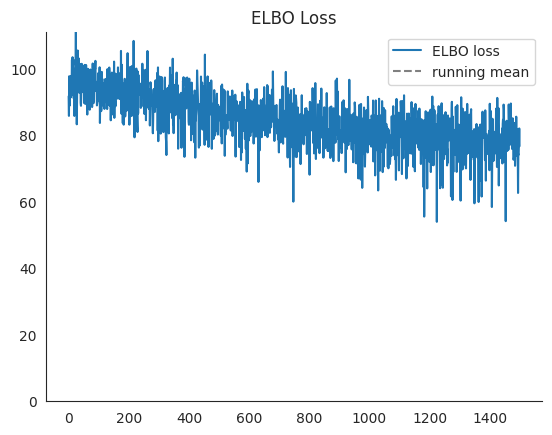

100 111
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 107.1344
[iteration 0050] loss: 104.7129
[iteration 0100] loss: 108.3962
[iteration 0150] loss: 108.0452
[iteration 0200] loss: 115.5683
[iteration 0250] loss: 105.7564
[iteration 0300] loss: 103.8056
[iteration 0350] loss: 94.2535
[iteration 0400] loss: 98.9705
[iteration 0450] loss: 102.3105
[iteration 0500] loss: 92.1124
[iteration 0550] loss: 100.1657
[iteration 0600] loss: 100.7388
[iteration 0650] loss: 90.2077
[iteration 0700] loss: 93.5036
[iteration 0750] loss: 92.1743
[iteration 0800] loss: 81.9965
[iteration 0850] loss: 93.7845
[iteration 0900] loss: 95.0791
[iteration 0950] loss: 81.9902
[iteration 1000] loss: 90.4560
[iteration 1050] loss: 92.0513
[iteration 1100] loss: 100.0719
[iteration 1150] loss: 91.0066
[iteration 1200] loss: 81.0763
[iteration 1250] loss: 87.8927
[iteration 1300] loss: 88.7909
[iteration 1350] loss: 91.1186
[iteration 1400] loss: 87.2342


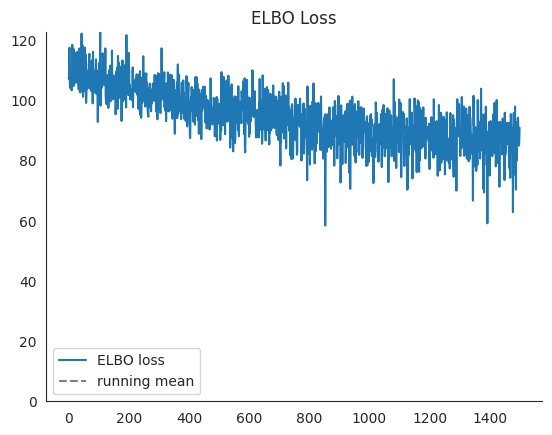

100 112
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 126.1981
[iteration 0050] loss: 118.2822
[iteration 0100] loss: 114.6366
[iteration 0150] loss: 106.0796
[iteration 0200] loss: 114.6542
[iteration 0250] loss: 111.8555
[iteration 0300] loss: 110.1412
[iteration 0350] loss: 108.2675
[iteration 0400] loss: 107.4390
[iteration 0450] loss: 116.0377
[iteration 0500] loss: 108.3720
[iteration 0550] loss: 108.5047
[iteration 0600] loss: 103.7398
[iteration 0650] loss: 86.8532
[iteration 0700] loss: 108.1555
[iteration 0750] loss: 102.3940
[iteration 0800] loss: 98.3489
[iteration 0850] loss: 93.7928
[iteration 0900] loss: 96.6121
[iteration 0950] loss: 107.1041
[iteration 1000] loss: 102.0274
[iteration 1050] loss: 93.5671
[iteration 1100] loss: 92.9925
[iteration 1150] loss: 101.9024
[iteration 1200] loss: 98.3720
[iteration 1250] loss: 62.3215
[iteration 1300] loss: 86.1211
[iteration 1350] loss: 86.5266
[iteration 1400] loss: 9

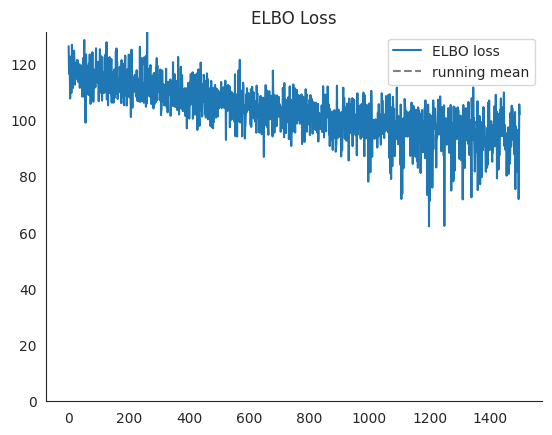

100 113
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 124.8286
[iteration 0050] loss: 119.6553
[iteration 0100] loss: 108.7343
[iteration 0150] loss: 120.0529
[iteration 0200] loss: 120.2876
[iteration 0250] loss: 122.2586
[iteration 0300] loss: 116.9620
[iteration 0350] loss: 110.3115
[iteration 0400] loss: 108.4752
[iteration 0450] loss: 122.7264
[iteration 0500] loss: 111.6342
[iteration 0550] loss: 112.4149
[iteration 0600] loss: 124.2308
[iteration 0650] loss: 108.1930
[iteration 0700] loss: 105.1558
[iteration 0750] loss: 117.9097
[iteration 0800] loss: 104.1769
[iteration 0850] loss: 103.6266
[iteration 0900] loss: 98.0090
[iteration 0950] loss: 99.2129
[iteration 1000] loss: 101.1659
[iteration 1050] loss: 83.2404
[iteration 1100] loss: 107.5050
[iteration 1150] loss: 95.7041
[iteration 1200] loss: 110.5612
[iteration 1250] loss: 109.4357
[iteration 1300] loss: 109.4107
[iteration 1350] loss: 101.7557
[iteration 1400] l

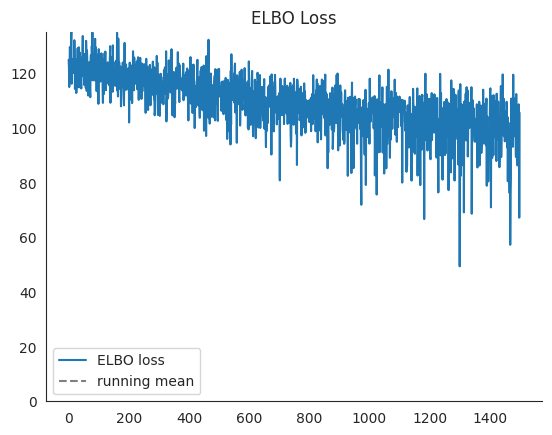

100 114
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 139.2667
[iteration 0050] loss: 120.1319
[iteration 0100] loss: 128.7082
[iteration 0150] loss: 131.3003
[iteration 0200] loss: 131.2178
[iteration 0250] loss: 130.7461
[iteration 0300] loss: 116.9353
[iteration 0350] loss: 124.9118
[iteration 0400] loss: 115.5863
[iteration 0450] loss: 111.4326
[iteration 0500] loss: 115.3501
[iteration 0550] loss: 117.5333
[iteration 0600] loss: 109.7275
[iteration 0650] loss: 113.7697
[iteration 0700] loss: 105.4344
[iteration 0750] loss: 108.8485
[iteration 0800] loss: 111.4369
[iteration 0850] loss: 114.6413
[iteration 0900] loss: 91.6622
[iteration 0950] loss: 114.2710
[iteration 1000] loss: 119.5185
[iteration 1050] loss: 113.7735
[iteration 1100] loss: 115.6793
[iteration 1150] loss: 115.1440
[iteration 1200] loss: 121.6183
[iteration 1250] loss: 113.2106
[iteration 1300] loss: 94.2966
[iteration 1350] loss: 107.7982
[iteration 1400]

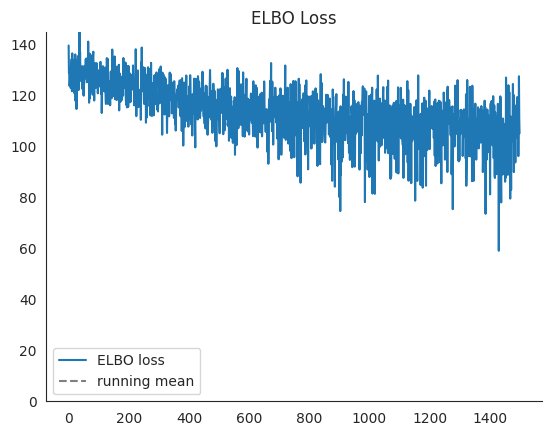

100 115
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 147.0362
[iteration 0050] loss: 143.4718
[iteration 0100] loss: 144.7468
[iteration 0150] loss: 141.0870
[iteration 0200] loss: 125.0603
[iteration 0250] loss: 146.2253
[iteration 0300] loss: 140.7085
[iteration 0350] loss: 136.1653
[iteration 0400] loss: 135.3630
[iteration 0450] loss: 130.0644
[iteration 0500] loss: 129.7603
[iteration 0550] loss: 121.4761
[iteration 0600] loss: 134.7744
[iteration 0650] loss: 119.4863
[iteration 0700] loss: 127.1277
[iteration 0750] loss: 125.0094
[iteration 0800] loss: 125.1827
[iteration 0850] loss: 129.6723
[iteration 0900] loss: 122.9715
[iteration 0950] loss: 129.7803
[iteration 1000] loss: 117.8034
[iteration 1050] loss: 130.3834
[iteration 1100] loss: 117.6099
[iteration 1150] loss: 119.0649
[iteration 1200] loss: 119.3519
[iteration 1250] loss: 116.8759
[iteration 1300] loss: 106.0345
[iteration 1350] loss: 124.3863
[iteration 140

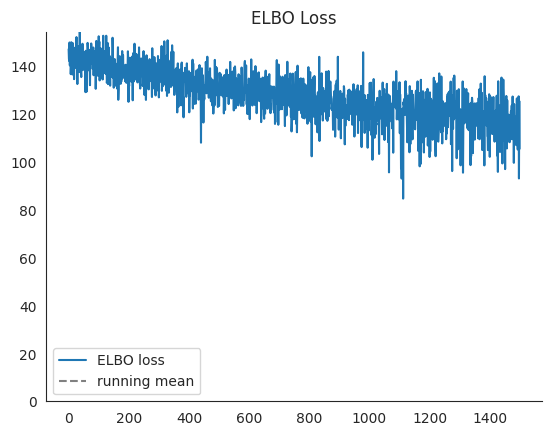

100 120
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 186.6232
[iteration 0050] loss: 177.6432
[iteration 0100] loss: 178.6553
[iteration 0150] loss: 190.3433
[iteration 0200] loss: 173.9504
[iteration 0250] loss: 184.9297
[iteration 0300] loss: 187.0339
[iteration 0350] loss: 184.9252
[iteration 0400] loss: 182.2926
[iteration 0450] loss: 171.7004
[iteration 0500] loss: 167.7060
[iteration 0550] loss: 171.9954
[iteration 0600] loss: 169.7397
[iteration 0650] loss: 178.1774
[iteration 0700] loss: 173.2021
[iteration 0750] loss: 167.2355
[iteration 0800] loss: 158.1957
[iteration 0850] loss: 170.2999
[iteration 0900] loss: 150.4146
[iteration 0950] loss: 165.1125
[iteration 1000] loss: 164.5122
[iteration 1050] loss: 165.1142
[iteration 1100] loss: 147.8243
[iteration 1150] loss: 163.9032
[iteration 1200] loss: 161.8492
[iteration 1250] loss: 142.1443
[iteration 1300] loss: 161.3049
[iteration 1350] loss: 160.8219
[iteration 140

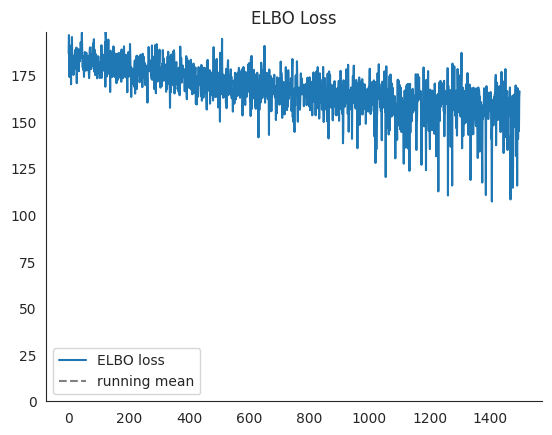

100 130
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 276.8478
[iteration 0050] loss: 269.4049
[iteration 0100] loss: 263.2516
[iteration 0150] loss: 270.1083
[iteration 0200] loss: 257.9060
[iteration 0250] loss: 261.7111
[iteration 0300] loss: 269.3122
[iteration 0350] loss: 265.0005
[iteration 0400] loss: 249.1649
[iteration 0450] loss: 259.8746
[iteration 0500] loss: 245.1526
[iteration 0550] loss: 254.5603
[iteration 0600] loss: 247.1145
[iteration 0650] loss: 257.3027
[iteration 0700] loss: 264.8596
[iteration 0750] loss: 251.1342
[iteration 0800] loss: 243.1389
[iteration 0850] loss: 247.7058
[iteration 0900] loss: 253.7604
[iteration 0950] loss: 228.2495
[iteration 1000] loss: 244.4844
[iteration 1050] loss: 242.1000
[iteration 1100] loss: 228.6895
[iteration 1150] loss: 240.4034
[iteration 1200] loss: 252.2673
[iteration 1250] loss: 227.5269
[iteration 1300] loss: 245.4164
[iteration 1350] loss: 234.1505
[iteration 140

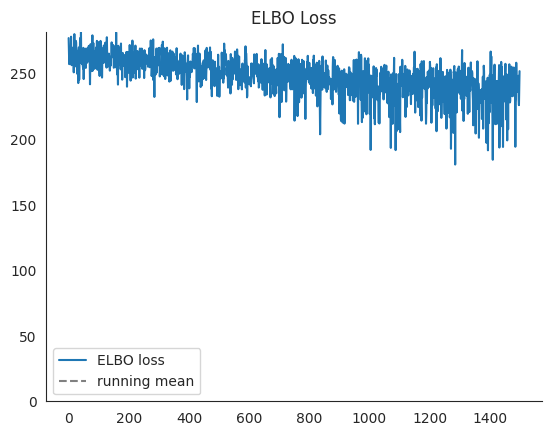

100 140
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 319.4898
[iteration 0050] loss: 323.7326
[iteration 0100] loss: 321.7661
[iteration 0150] loss: 312.6684
[iteration 0200] loss: 319.4237
[iteration 0250] loss: 352.1140
[iteration 0300] loss: 332.3717
[iteration 0350] loss: 302.1360
[iteration 0400] loss: 299.0607
[iteration 0450] loss: 304.4239
[iteration 0500] loss: 325.8035
[iteration 0550] loss: 293.0925
[iteration 0600] loss: 302.3389
[iteration 0650] loss: 336.9158
[iteration 0700] loss: 344.9314
[iteration 0750] loss: 311.2504
[iteration 0800] loss: 274.8254
[iteration 0850] loss: 324.7183
[iteration 0900] loss: 254.8579
[iteration 0950] loss: 311.7319
[iteration 1000] loss: 328.5904
[iteration 1050] loss: 283.1211
[iteration 1100] loss: 251.2825
[iteration 1150] loss: 317.0582
[iteration 1200] loss: 246.9166
[iteration 1250] loss: 319.3152
[iteration 1300] loss: 288.0646
[iteration 1350] loss: 293.6547
[iteration 140

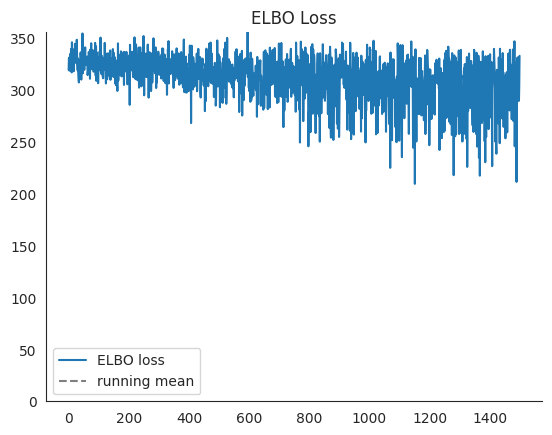

100 150
No validation samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 457.1384
[iteration 0050] loss: 432.1218
[iteration 0100] loss: 436.4132
[iteration 0150] loss: 431.6044
[iteration 0200] loss: 439.7853
[iteration 0250] loss: 431.1206
[iteration 0300] loss: 413.3249
[iteration 0350] loss: 424.8389
[iteration 0400] loss: 423.3839
[iteration 0450] loss: 425.1949
[iteration 0500] loss: 441.4368
[iteration 0550] loss: 431.6099
[iteration 0600] loss: 419.4507
[iteration 0650] loss: 422.8045
[iteration 0700] loss: 418.7427
[iteration 0750] loss: 409.9780
[iteration 0800] loss: 387.4741
[iteration 0850] loss: 409.4475
[iteration 0900] loss: 397.8109
[iteration 0950] loss: 420.6852
[iteration 1000] loss: 419.7111
[iteration 1050] loss: 423.1648
[iteration 1100] loss: 373.4378
[iteration 1150] loss: 405.9782
[iteration 1200] loss: 392.5364
[iteration 1250] loss: 405.0643
[iteration 1300] loss: 406.0416
[iteration 1350] loss: 396.5756
[iteration 140

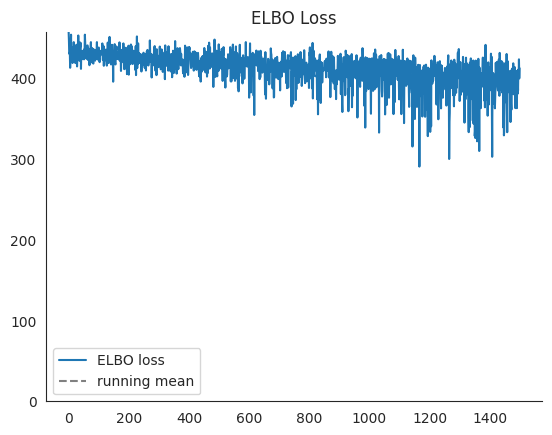

In [2]:
data_code = "15EQ20191202"
validation_data_code = "15EQ20191205"

starts = []
ends = []
v_null_mses = []
v_model_mses = []
v_rsquareds = []




for start in [0, 20, 40, 60, 80, 100 ]: 
    for end in [start + end for end in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 30, 40, 50, 60, 70, 80 ]]:
        starts.append(start)
        ends.append(end)
        print(start, end)

        locds = lc.LocustDS(data_code = data_code, 
                    start = start,
                    end = end,)
        locds.validate(validation_data_code = validation_data_code)

    

        v_null_mses.append(locds.validation[validation_data_code]['null_mse'].numpy())   
        v_model_mses.append(locds.validation[validation_data_code]['mse_mean'])
        v_rsquareds.append(locds.validation[validation_data_code]['rsquared'])
        


2024-02-05 13:07:13,505 - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2024-02-05 13:07:13,524 - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


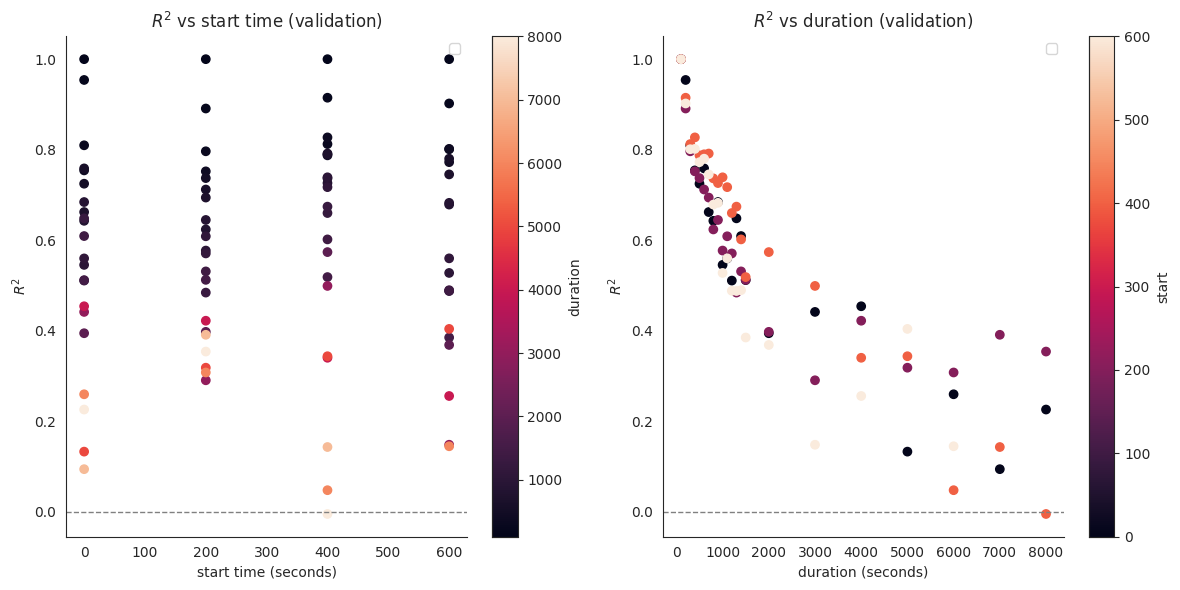

In [13]:
v_results = pd.DataFrame(
    {"start": [_ * 10 for _ in starts][:-1],
    "end":  [_ *10 for _ in ends][:-1],
    "null_mse":  null_mses,
    "model_mse": model_mses,
    "rsquared": rsquareds}
)

v_results['duration'] = [_ * 10 for _ in (v_results['end'] - v_results['start'])]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
scatter = plt.scatter(v_results['start'] , v_results['rsquared'], marker='o', c=v_results['duration'])
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)


cbar = plt.colorbar(scatter, label='duration')
plt.xlabel('start time (seconds)')
plt.ylabel('$R^2$')
plt.title('$R^2$ vs start time (validation)')
sns.despine()
plt.legend()


plt.subplot(1, 2, 2)  
scatter2 = plt.scatter(v_results['duration'], v_results['rsquared'], marker='o', c=v_results['start'])
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

cbar = plt.colorbar(scatter2, label='start')
plt.xlabel('duration (seconds)')
plt.ylabel('$R^2$')
plt.title('$R^2$ vs duration (validation)')
sns.despine()
plt.legend()

plt.tight_layout()  
plt.show()


root = find_repo_root()
results_path =  os.path.join(
            root, f"data/foraging/locust/ds/length_experiment_v_results_{data_code}_v{validation_data_code}.pkl"
        )
with open(results_path, "wb") as f:
    dill.dump(v_results, f)
